In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sampled_features, sampled_embeddings = joblib.load('../data/prelim/Feb-20-2023_embeddings.sav')
_, assignments, _, soft_assignments = joblib.load('../data/prelim/Feb-20-2023_clusters.sav')
folders, folder, filenames, new_data, new_predictions = joblib.load('../data/prelim/Feb-20-2023_predictions.sav')

In [3]:
behavior_names = ['pause', 'sniff_1', 'sniff_2', 'groom', 'rear',
                  'sniff_3', 'groom/rear', 'orientL', 'loco_Lfore', 'orientR_big',
                  'loco_Rfore', 'orientR_small']
behav_order = ['pause', 'sniff_1', 'sniff_2', 'sniff_3', 'rear',
               'groom/rear', 'groom', 'orientL', 'orientR_big', 'orientR_small',
               'loco_Lfore', 'loco_Rfore']

behavior_order_idx = [behavior_names.index(behav_order[i]) for i in range(len(behav_order))]

In [4]:
animal_id = [filenames[j].rpartition('DLC_')[0].rpartition('\\')[2] for j in range(len(filenames))]

In [5]:
data_dict = {'animal_id': np.hstack([np.repeat(animal_id[i], len(new_predictions[i]))
                           for i in range(len(new_predictions))]),
             'behavior': [behavior_names[j] for j in np.hstack(new_predictions)]}
labels_df = pd.DataFrame(data=data_dict)
labels_df['behavior'] = pd.Categorical(labels_df['behavior'], behav_order)

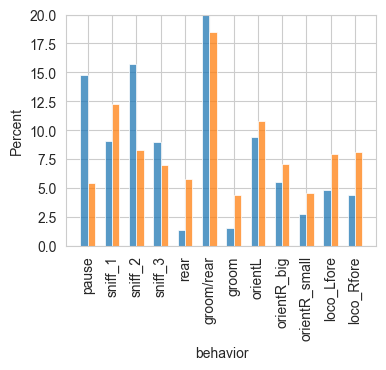

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = sns.histplot(data=labels_df,
                  x='behavior',
                  shrink=.6,
                  hue='animal_id',
                  multiple="dodge",
                  stat = 'percent',
                  legend=False,
                  common_norm=False)
ax.set_xticks(np.arange(0, len(behav_order)))
ax.set_xticklabels(behav_order, rotation=90)
ax.set_ylim([0, 20])

plt.show()

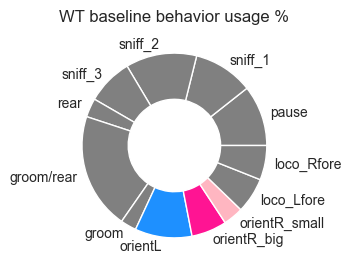

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = [np.sum(labels_df['behavior']==b) for b in behav_order]
pie_colors = ['gray', 'gray', 'gray', 'gray', 'gray',
              'gray', 'gray', 'dodgerblue', 'deeppink', 'lightpink',
              'gray', 'gray']
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
wedges, texts = ax.pie(sizes,
                       labels=behav_order,
                       colors=pie_colors,
                       wedgeprops=dict(width=0.5),
                       startangle=0)

ax.set_title("WT baseline behavior usage %")

plt.show()
# fig.savefig('../figures/wt_baseline_behavior_usage.svg', dpi=300)